In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.stats import norm
import scipy.constants as scp
from tabulate import tabulate
from scipy import signal

---

# Wellenlänge des grünen Lasers

In [2]:
#Messwerte:
si = 10**(-6) * np.array([10.0, 26.0, 110.0, 356.0, 848.0])
sf = 10**(-6) * np.array([3187.5, 3002.0, 3092.0, 3332.0, 3824.0])
m = np.array([10512, 10528, 10549, 10464, 10193])

#Wegdifferenzen
ds = sf - si
dds = 10**(-6) * 9.0

#Wellenlängen für jede messung
lamb = 2 * ds/m
dlamb = 2 * dds/m

#Mittelwert:
lamb_m = np.mean(lamb)
dlamb_m = np.sqrt((np.std(lamb, ddof=1)/np.sqrt(5))**2 + (1/5 * np.sum(dlamb))**2)

print('lamb = (', np.round(lamb_m, 9), '+/-', np.round(dlamb_m, 9), ') m')

lamb = ( 5.78e-07 +/- 8e-09 ) m


In [3]:
#Vergleich Herstellerwert:
lamb_lit = 532 * 10**(-9)
dlamb_lit = 1 * 10**(-9)

sign_lamb = np.abs(lamb_m - lamb_lit)/np.sqrt(dlamb_m**2 + dlamb_lit**2)
print('sigma_lamb =', sign_lamb)

sigma_lamb = 5.8318048610145


In [4]:
#Tabelle für auswertung:
head1 = ['Nr.', 'm', 'ds', 'dds', 'lamb', 'dlamb']
tab1 = zip(np.arange(1,6), m, np.round(ds, 6), np.round(np.full(5,dds), 6), np.round(lamb, 10), np.round(dlamb, 10))

print(tabulate(tab1, headers=head1, tablefmt="latex"))

\begin{tabular}{rrrrrr}
\hline
   Nr. &     m &       ds &   dds &      lamb &   dlamb \\
\hline
     1 & 10512 & 0.003177 & 9e-06 & 6.045e-07 & 1.7e-09 \\
     2 & 10528 & 0.002976 & 9e-06 & 5.653e-07 & 1.7e-09 \\
     3 & 10549 & 0.002982 & 9e-06 & 5.654e-07 & 1.7e-09 \\
     4 & 10464 & 0.002976 & 9e-06 & 5.688e-07 & 1.7e-09 \\
     5 & 10193 & 0.002976 & 9e-06 & 5.839e-07 & 1.8e-09 \\
\hline
\end{tabular}


# Brechungsindex von Luft

In [5]:
#Messwerte:
dm = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
p1 = np.array([645, 575, 495, 420, 345, 270, 195, 120, 45])
p2 = np.array([715, 640, 565, 490, 415, 340, 265, 190, 150, 40])
p3 = np.array([705, 630, 555, 480, 405, 330, 255, 180, 105, 25])
dp1 = np.full(9, 5)
dp2 = np.full(10, 5)
dp3 = np.full(10, 5)

In [6]:
#Fit
def linear(x, a, b):
    return a * x + b

-0.06644518272744711


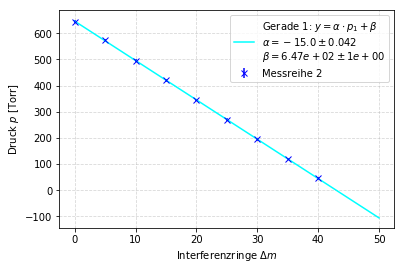

In [7]:
opt11, cov11 = curve_fit(linear, dm[0:9], p1, sigma=dp1)

x = np.linspace(0, 50, 100)

plt.grid(alpha=0.5, linestyle='--')
plt.ylabel('Druck $p$ [Torr]')
plt.xlabel('Interferenzringe $\Delta m$')
plt.errorbar(y=p1, x=dm[0:9], yerr=dp1, fmt='x', color='blue', label='Messreihe 2')
plt.plot(x, linear(x, *opt11), color='cyan',
        label="\n".join([r"Gerade 1: $y = \alpha \cdot p_1 + \beta$", 
                          r'$ \alpha ={:.3}\pm{:.2}$'.format(opt11[0], np.sqrt(cov11[0][0])), 
                          r'$ \beta ={:.3}\pm{:.1}$'.format(opt11[1], np.sqrt(cov11[1][1]))]))
plt.legend()
plt.savefig('./output/Brechungsindex1.pdf', format='PDF')

print(1/opt11[0])

-0.06801319043760126


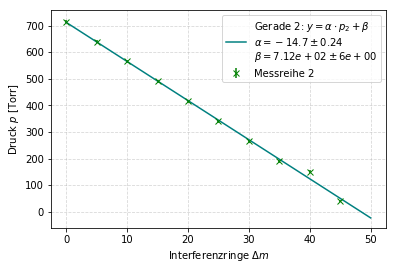

In [8]:
opt22, cov22 = curve_fit(linear, dm, p2, sigma=dp2)

x = np.linspace(0, 50, 100)

plt.grid(alpha=0.5, linestyle='--')
plt.ylabel('Druck $p$ [Torr]')
plt.xlabel('Interferenzringe $\Delta m$')
plt.errorbar(y=p2, x=dm, yerr=dp2, fmt='x', color='green', label='Messreihe 2')
plt.plot(x, linear(x, *opt22), color='teal',
        label="\n".join([r"Gerade 2: $y = \alpha \cdot p_2 + \beta$", 
                          r'$\alpha ={:.3}\pm{:.2}$'.format(opt22[0], np.sqrt(cov22[0][0])), 
                          r'$\beta ={:.3}\pm{:.1}$'.format(opt22[1], np.sqrt(cov22[1][1]))]))
plt.legend()
plt.savefig('./output/Brechungsindex2.pdf', format='PDF')

print(1/opt22[0])

-0.06642512077226694


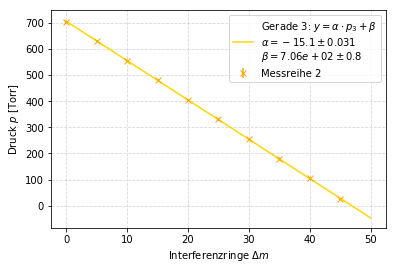

In [9]:
opt33, cov33 = curve_fit(linear, dm, p3, sigma=dp3)

x = np.linspace(0, 50, 100)

plt.grid(alpha=0.5, linestyle='--')
plt.ylabel('Druck $p$ [Torr]')
plt.xlabel('Interferenzringe $\Delta m$')
plt.errorbar(y=p3, x=dm, yerr=dp3, fmt='x', color='orange', label='Messreihe 2')
plt.plot(x, linear(x, *opt33), color='gold',
        label="\n".join([r"Gerade 3: $y = \alpha \cdot p_3 + \beta$", 
                          r'$\alpha ={:.3}\pm{:.2}$'.format(opt33[0], np.sqrt(cov33[0][0])), 
                          r'$\beta ={:.3}\pm{:.1}$'.format(opt33[1], np.sqrt(cov33[1][1]))]))
plt.legend()
plt.savefig('./output/Brechungsindex3.pdf', format='PDF')

print(1/opt33[0])

In [10]:
steigungen = np.array([1/opt11[0], 1/opt22[0], 1/opt33[0]])
dsteigungen = steigungen * np.array([np.sqrt(cov11[0][0])/opt11[0], np.sqrt(cov22[0][0])/opt22[0], np.sqrt(cov33[0][0])/opt33[0]])

grad = np.abs(np.mean(steigungen))
dgrad = np.sqrt((np.std(steigungen, ddof=1)/np.sqrt(3))**2 + (1/3 * np.sum(dsteigungen))**2)

print('Grad = (', np.round(grad, 4), '+/-', np.round(dgrad, 4), ') 1/Torr')

Grad = ( 0.067 +/- 0.0007 ) 1/Torr


In [11]:
T0 = 273.15 #K
p0 = 760 #Torr
a = 50 * 10**(-3) #m
da = 0.05 * 10**(-3) #m
T = 273.15 + 24.5 #K
dT = 0.2

n0_red = lamb_lit * grad * p0 * T /(2 * a * T0)
n0 = n0_red + 1
dn0 = n0_red * np.sqrt((da/a)**2 + (dgrad/grad)**2 + (dT/T)**2 + (dlamb_lit/lamb_lit)**2)


print('n_0 =', np.round(n0, 6), '+/-', np.round(dn0, 6))

n_0 = 1.000295 +/- 3e-06


In [12]:
n0lit = 1.00028

print('sigma_n0 =', np.abs(n0lit-n0)/dn0)

sigma_n0 = 4.718349734803689


In [13]:
#Tabelle:
head2 = ['Nr.', 'a', 'da', 'm/p', 'd(m/p)']
tab2 = zip(np.arange(1,4), 
           np.array([opt11[0], opt22[0], opt33[0]]), 
          np.array([np.sqrt(cov11[0][0]), np.sqrt(cov22[0][0]), np.sqrt(cov33[0][0])]),
          steigungen, dsteigungen)

print(tabulate(tab2, headers=head2, tablefmt="latex"))

\begin{tabular}{rrrrr}
\hline
   Nr. &        a &        da &        m/p &      d(m/p) \\
\hline
     1 & -15.05   & 0.0419435 & -0.0664452 & 0.000185179 \\
     2 & -14.703  & 0.236208  & -0.0680132 & 0.00109265  \\
     3 & -15.0545 & 0.0314918 & -0.0664251 & 0.000138951 \\
\hline
\end{tabular}


# Kohärenzlänge der LED

In [14]:
data=np.genfromtxt('./TEK00001.CSV',delimiter=",",skip_header=18)
t_=data[:,0:1]
t=t_[:, 0]
U_=data[:,1:2]
U=U_[:, 0]

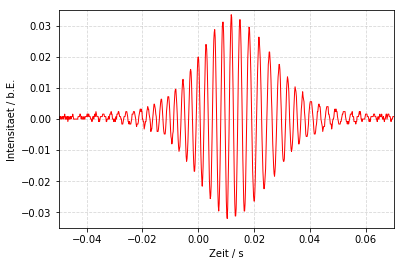

In [15]:
plt.grid(alpha=0.5, linestyle='--')
plt.plot(t,U, color='red', linewidth=1)
plt.xlabel('Zeit / s')
plt.ylabel('Intensitaet / b.E.')
plt.axis([-0.05, 0.07, -0.035, 0.035])
plt.savefig('./output/interferogramm_raw.pdf',format='pdf')

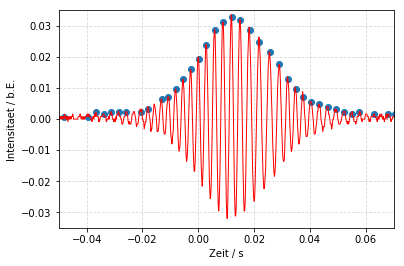

In [16]:
peakind = signal.find_peaks_cwt(U, np.arange(1,30),noise_perc=20)
plt.grid(alpha=0.5, linestyle='--')
plt.plot(t[peakind], U[peakind],marker='o',linewidth=0)
plt.plot(t,U, color='red', linewidth=1)
plt.xlabel('Zeit / s')
plt.ylabel('Intensitaet / b.E.')
plt.axis([-0.05, 0.07, -0.035, 0.035])
plt.savefig('./output/interferogramm_peaks.pdf',format='pdf')

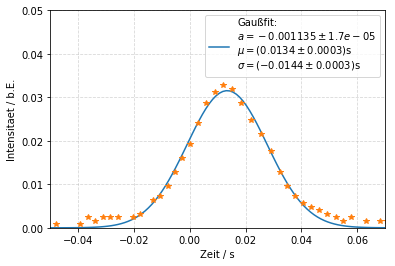

In [17]:
def gaussian(t, a, mu, sig):
    return a/np.sqrt(2*np.pi)/sig*np.exp(-(t-mu)**2/(2*sig**2))

popt, pcov= curve_fit(gaussian, t[peakind], U[peakind])

x=np.linspace(-0.05,0.07,100) 
plt.grid(alpha=0.5, linestyle='--')
plt.plot(x, gaussian(x, *popt), 
         label="\n".join(["Gaußfit:", 
                          r'$a={:.6f}\pm{:.2}$'.format(popt[0], np.sqrt(pcov[0][0])), 
                          r'$\mu = ({:.4f}\pm{:.1})$s'.format(popt[1], np.sqrt(pcov[1][1])),
                         r'$\sigma = ({:.4f}\pm{:.1})$s'.format(popt[2], np.sqrt(pcov[2][2]))]))
plt.plot(t[peakind], U[peakind],marker='*', linewidth=0)
plt.xlabel('Zeit / s')
plt.ylabel('Intensitaet / b.E.')
plt.axis([-0.05, 0.07, 0, 0.05])
plt.legend()
plt.savefig('./output/interferogramm_gauß.pdf',format='pdf')

In [18]:
print("a =",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("mu =",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))
print("sig =",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))

a = -0.001135261561779844 , Standardfehler= 1.7196484927415144e-05
mu = 0.013371923466828589 , Standardfehler= 0.0002515940916996059
sig = -0.014361527616227273 , Standardfehler= 0.00025001697943362886


In [19]:
v = 0.1 * 10**(-3) #m/s

#Halbwertsbreite:
FWHM = np.abs(2 * np.sqrt(2 * np.log(2)) * popt[2])
dFWHM = 2 * np.sqrt(2 * np.log(2)) * np.sqrt(pcov[2][2])

#Kohärenzlänge:
L = np.abs(2 * FWHM * v)
dL = 2 * v * dFWHM

print('FWHM = (', np.round(FWHM, 4), '+/-', np.round(dFWHM, 4), ') m')
print('L = (', np.round(L, 8), '+/-', np.round(dL, 8), ') m')

FWHM = ( 0.0338 +/- 0.0006 ) m
L = ( 6.76e-06 +/- 1.2e-07 ) m
